In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt

In [49]:
df = pd.read_csv('MyDataset_12_twice.csv')

In [50]:
df = df.drop('login', axis=1)


In [51]:
df.drop_duplicates()

,mounth,year,failCount,failPause,failMax,lifeTime,activeLife,calls,rejectedCalls,unansweredCalls,...,addItv,gender,payments,paymentType,paymentSum,serviceTask,lk,bigFailure,sms,outflow
0,3,2021,3,29760,29460,75368162,72642553,0,0,0,...,0,1,2,6,1085,0,0,0,2,0
1,3,2021,7,32820,30060,151481621,146966400,1,1,0,...,0,0,2,6,1300,0,0,0,2,0
2,3,2021,1,360,360,99732809,55036800,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,2021,3,51960,39160,154685621,155088000,3,1,1,...,0,1,2,6,1400,0,0,0,2,0
4,3,2021,3,51900,39101,154690459,155088000,8,2,1,...,0,0,0,0,0,5,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119442,2,2024,1,23460,23460,383302176,335330247,0,0,0,...,0,0,2,6,960,0,0,0,0,0
119443,2,2024,8,44280,27840,374746361,360201600,0,0,0,...,0,0,2,6,1000,0,0,0,0,0
119444,2,2024,8,23340,13500,251119560,253324800,0,0,0,...,0,0,1,3,1300,0,0,0,1,0
119445,2,2024,4,7513,6133,140694505,140572800,0,0,0,...,0,0,2,6,1980,0,0,0,3,0


In [52]:
df

,mounth,year,failCount,failPause,failMax,lifeTime,activeLife,calls,rejectedCalls,unansweredCalls,...,addItv,gender,payments,paymentType,paymentSum,serviceTask,lk,bigFailure,sms,outflow
0,3,2021,3,29760,29460,75368162,72642553,0,0,0,...,0,1,2,6,1085,0,0,0,2,0
1,3,2021,7,32820,30060,151481621,146966400,1,1,0,...,0,0,2,6,1300,0,0,0,2,0
2,3,2021,1,360,360,99732809,55036800,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,2021,3,51960,39160,154685621,155088000,3,1,1,...,0,1,2,6,1400,0,0,0,2,0
4,3,2021,3,51900,39101,154690459,155088000,8,2,1,...,0,0,0,0,0,5,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119442,2,2024,1,23460,23460,383302176,335330247,0,0,0,...,0,0,2,6,960,0,0,0,0,0
119443,2,2024,8,44280,27840,374746361,360201600,0,0,0,...,0,0,2,6,1000,0,0,0,0,0
119444,2,2024,8,23340,13500,251119560,253324800,0,0,0,...,0,0,1,3,1300,0,0,0,1,0
119445,2,2024,4,7513,6133,140694505,140572800,0,0,0,...,0,0,2,6,1980,0,0,0,3,0


In [53]:
# Разделим данные на признаки и целевую переменную
X_train = df[df['year'] != 2024].drop('outflow', axis=1)
X_test = df[df['year'] == 2024].drop('outflow', axis=1)

y_train = df[df['year'] != 2024]['outflow']
y_test = df[df['year'] == 2024]['outflow']

In [54]:
X_train = X_train.drop('year', axis=1)
X_test = X_test.drop('year', axis=1)

In [55]:
model = LogisticRegression(penalty='l2', 
                           solver='liblinear', 
                           max_iter=10000,
                           class_weight={0: 1, 1: 100})
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 100}, max_iter=10000,
                   solver='liblinear')

In [56]:
# Прогнозирование
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.6379
Confusion Matrix:
[[5184 2961]
 [  14   58]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      8145
           1       0.02      0.81      0.04        72

    accuracy                           0.64      8217
   macro avg       0.51      0.72      0.41      8217
weighted avg       0.99      0.64      0.77      8217



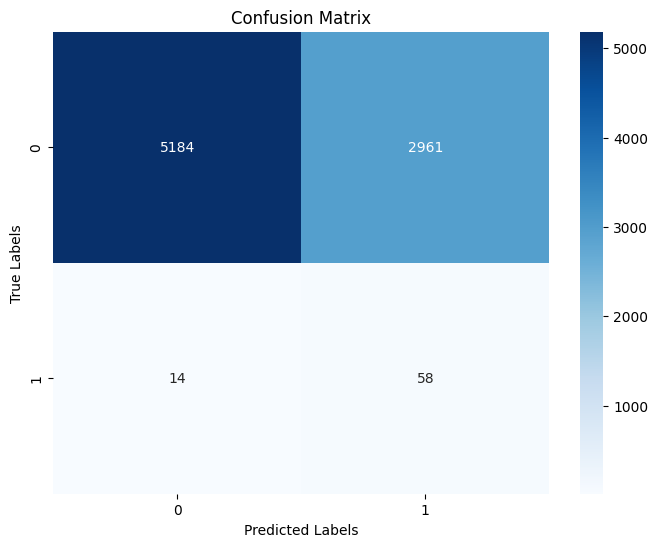

In [57]:

# Визуализация Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Feature Importance')

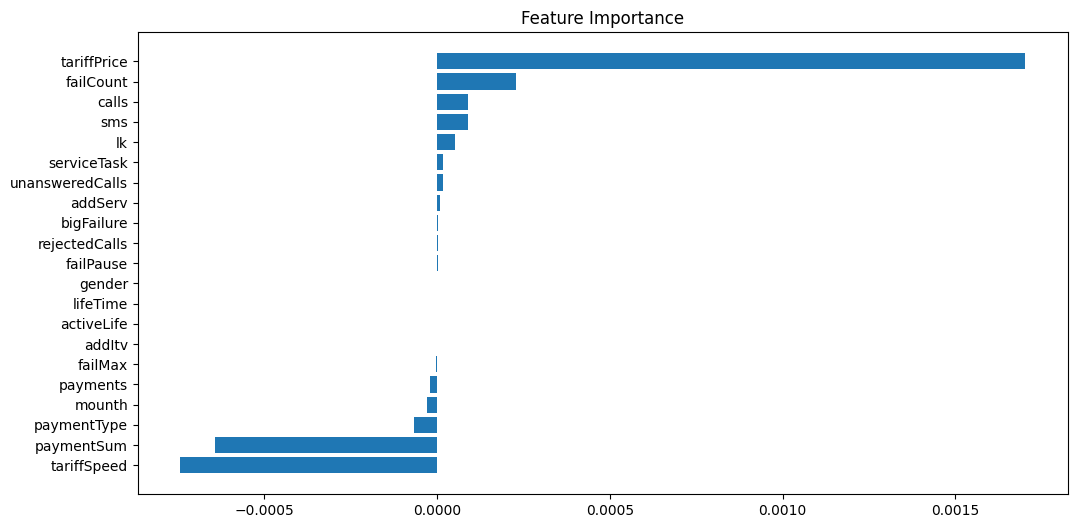

In [58]:
feature_importance = model.coef_[0]
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance')

In [59]:
probabilities = model.predict_proba(X_test)
print("Predicted probabilities:", probabilities)

Predicted probabilities: [[0.5202175  0.4797825 ]
 [0.54557532 0.45442468]
 [0.17002648 0.82997352]
 ...
 [0.63508709 0.36491291]
 [0.50792622 0.49207378]
 [0.76148635 0.23851365]]


/home/leo/Documents/Projects/machine_learning_fridom/.venv/lib64/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


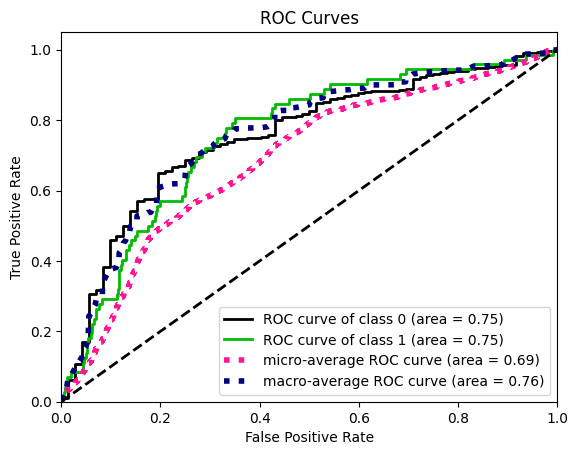

In [60]:
y_true = y_test
y_probas = probabilities
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()